<a href="https://colab.research.google.com/github/mc-juan-vargas-2024/cuadernos-y-proyectos-ia/blob/main/ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


In [7]:
df=pd.read_csv(path+"/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

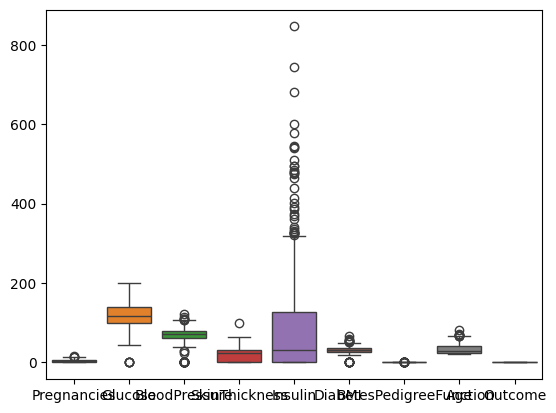

In [9]:
#graficar la caja de bigotes de cada una de las variables
import seaborn as sns
sns.boxplot(data=df)

In [10]:
# prompt: separa los datos de entrenamiento y los datos prueba, el campo etiquetado mio es age

from sklearn.model_selection import train_test_split

# Separar los datos en características (X) y etiqueta (y)
X = df.drop('Age', axis=1)  # Elimina la columna 'Age' para obtener las características
y = df['Age']  # La columna 'Age' es la etiqueta

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir las dimensiones de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (614, 8)
Forma de X_test: (154, 8)
Forma de y_train: (614,)
Forma de y_test: (154,)


In [13]:
# prompt: normaliza solo los features de entrenamiento y los datos de prueba usando minmax y muestralos

from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el scaler a los datos de entrenamiento y transformarlos
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba usando el scaler ajustado con los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)

# Mostrar los datos de entrenamiento normalizados
print("Datos de entrenamiento normalizados (X_train_scaled):\n", X_train_scaled)

# Mostrar los datos de prueba normalizados
print("\nDatos de prueba normalizados (X_test_scaled):\n", X_test_scaled)


Datos de entrenamiento normalizados (X_train_scaled):
 [[0.11764706 0.42211055 0.         ... 0.         0.09649872 0.        ]
 [0.52941176 0.56281407 0.67213115 ... 0.42026826 0.51409052 1.        ]
 [0.05882353 0.69849246 0.37704918 ... 0.42771982 0.24594364 0.        ]
 ...
 [0.58823529 0.50753769 0.70491803 ... 0.67958271 0.45175064 1.        ]
 [0.         0.70854271 0.         ... 0.6318927  0.05422716 1.        ]
 [0.         0.6281407  0.78688525 ... 0.33532042 0.07856533 0.        ]]

Datos de prueba normalizados (X_test_scaled):
 [[0.35294118 0.49246231 0.47540984 ... 0.50670641 0.15029889 0.        ]
 [0.11764706 0.56281407 0.6147541  ... 0.53204173 0.02988898 0.        ]
 [0.11764706 0.54271357 0.52459016 ... 0.45901639 0.03415884 0.        ]
 ...
 [0.47058824 0.47738693 0.59016393 ... 0.54843517 0.17378309 0.        ]
 [0.11764706 0.73366834 0.57377049 ... 0.41728763 0.11058924 1.        ]
 [0.47058824 0.3718593  0.57377049 ... 0.52608048 0.2677199  0.        ]]


In [21]:
# prompt: entrenar en SVR los features y la etiqueta

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Crear un modelo SVR
svr_model = SVR(kernel='linear',C=3)  # Puedes cambiar el kernel (linear, rbf, poly, etc.)

# Entrenar el modelo con los datos de entrenamiento
svr_model.fit(X_train_scaled, y_train)

# Hacer predicciones con el modelo entrenado
y_pred = svr_model.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)


Error cuadrático medio (MSE): 129.08915684600112
Coeficiente de determinación (R^2): 0.19252799104092433


In [22]:
# prompt: realizar inferencias del modelo svr utilizando grid search usando C de 0.5 a 5 con pasos de 0.1 y kerner {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

from sklearn.model_selection import GridSearchCV

# Definir los parámetros a ajustar
param_grid = {
    'C': [i/10 for i in range(5, 51)],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Crear un modelo SVR
svr_model = SVR()

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el mejor modelo entrenado
best_svr_model = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred = best_svr_model.predict(X_test_scaled)

# Evaluar el rendimiento del mejor modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)


Mejores parámetros: {'C': 5.0, 'kernel': 'rbf'}
Error cuadrático medio (MSE): 115.56266050417477
Coeficiente de determinación (R^2): 0.27713825143903026
